The Zomato CSV file typically refers to a dataset containing restaurant-related information collected from Zomato, an online food delivery and restaurant discovery platform. This dataset is commonly used for data analysis, machine learning, and recommendation system projects.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# df=pd.read_csv("zomato.csv")
# utf-8' codec can't decode byte 0xed in position 7044 , when this kind of error occurs we need emcoding there
# there are many kind of encoding in documentation
df = pd.read_csv("zomato.csv", encoding="ISO-8859-1") 
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# In Data Analysis What All the Things We Do
1. Missing  values
2. Explore about the Numerical variables
3. Explore about Categorical Variables
4. Finding Relationship Between features

## Handling Missing Values

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
# to know the specific null columns name
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

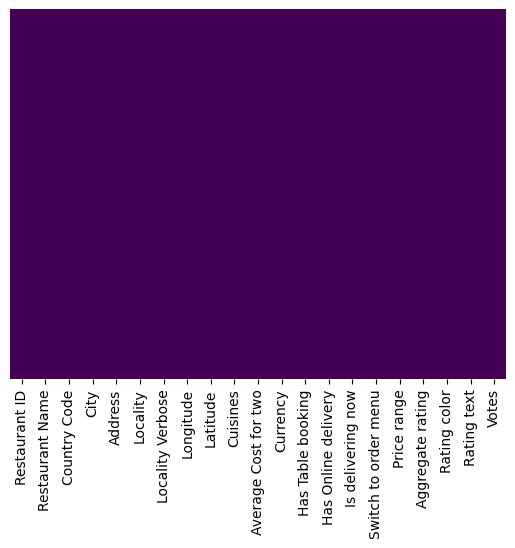

In [16]:
# to see the heatmap for null columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Loading Excel File

In [20]:
df_country=pd.read_excel("Country-Code.xlsx")
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


### Merging to dataset

In [23]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')
# here on is to define forign key to merge to dataset

In [24]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### To check datatypes

In [ ]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

### To check how many same attribute a column has

In [29]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [30]:
# to store the increasing sequence
country_name=final_df.Country.value_counts().index

In [32]:
# to store the values 
# to store the increasing sequence
country_values=final_df.Country.value_counts().values

### Creating a pie chart

([<matplotlib.patches.Wedge at 0x2195ce4d280>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

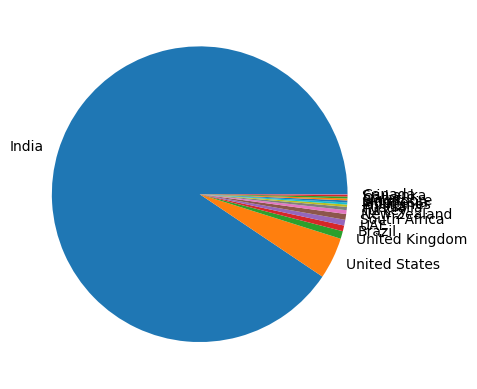

In [33]:
plt.pie(country_values,labels=country_name)

([<matplotlib.patches.Wedge at 0x2195f5a2a80>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

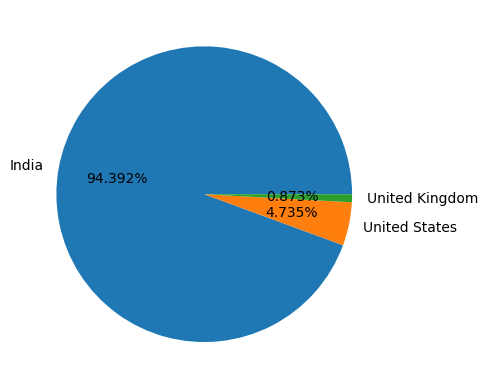

In [41]:
# taking top 3 countries to create pie chart
# autopct is for percentage
plt.pie(country_values[:3],labels=country_name[:3],autopct="%1.3f%%")

observation: zomato's maximum transaction is from India then USA , then UN

## NUmerical Values

# Encoding
to know more about encoding go to https://pandas.pydata.org/docs/search.html?q=encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 